#                      Kaggle Project on the Airbnb of Singapore 

<img src = "airbnb.jpg" style ='width: 900px; height: 400px'/>

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# import warnings 
# from future.warnings('ignore')

import geopandas as gpd            # Python Geospatial Data Library
plt.style.use('fivethirtyeight')
%matplotlib inline

'''Spatial Visualizations'''
import folium
import folium.plugins

In [2]:
# place my data in a dataframe
data = pd.read_csv('listings.csv')

In [3]:
# Inspecting my data 
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [4]:
data.tail(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7903,38108273,3bedroom luxury at Orchard,238891646,Neha,Central Region,Tanglin,1.29269,103.82623,Entire home/apt,550,6,0,NaN,NaN,34,365
7904,38109336,[ Farrer Park ] New City Fringe CBD Mins to MRT,281448565,Mindy,Central Region,Kallang,1.31286,103.85996,Private room,58,30,0,NaN,NaN,3,173
7905,38110493,Cheap Master Room in Central of Singapore,243835202,Huang,Central Region,River Valley,1.29543,103.83801,Private room,56,14,0,NaN,NaN,2,30
7906,38112762,Amazing room with private bathroom walk to Orc...,28788520,Terence,Central Region,River Valley,1.29672,103.83325,Private room,65,90,0,NaN,NaN,7,365


In [5]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,2.338862e+07,9.114481e+07,1.314192,103.848787,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,1.016416e+07,8.190910e+07,0.030577,0.043675,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,4.909100e+04,2.366600e+04,1.243870,103.646560,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.582180e+07,2.305808e+07,1.295795,103.835825,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,2.470627e+07,6.344891e+07,1.311030,103.849410,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,3.234850e+07,1.553811e+08,1.322110,103.872535,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,3.811276e+07,2.885676e+08,1.454590,103.973420,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
id                                7907 non-null int64
name                              7905 non-null object
host_id                           7907 non-null int64
host_name                         7907 non-null object
neighbourhood_group               7907 non-null object
neighbourhood                     7907 non-null object
latitude                          7907 non-null float64
longitude                         7907 non-null float64
room_type                         7907 non-null object
price                             7907 non-null int64
minimum_nights                    7907 non-null int64
number_of_reviews                 7907 non-null int64
last_review                       5149 non-null object
reviews_per_month                 5149 non-null float64
calculated_host_listings_count    7907 non-null int64
availability_365                  7907 non-null int64
dtypes: float64(3

### Dealing with Missing Values

In [7]:
# Checking for missing values in my data 
data.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

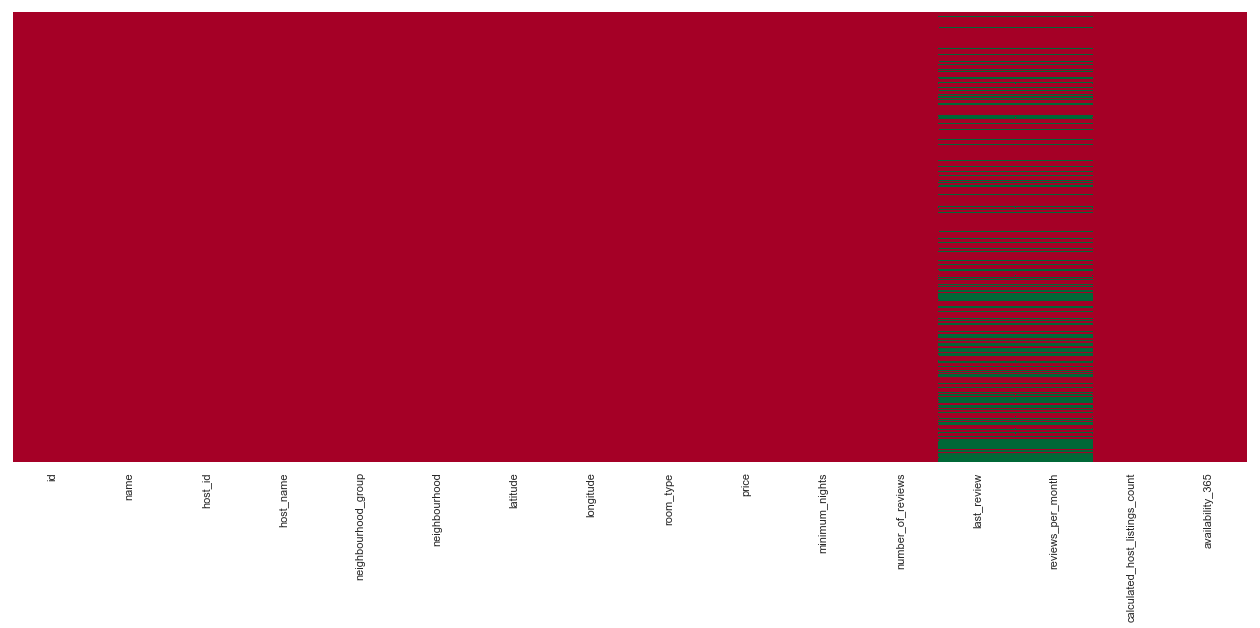

In [65]:
# Creating a heat map for the missing values

sns.set(rc = {'figure.figsize':(19.7,8.27)})

sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap ='RdYlGn')

In [9]:
# making a check point so i can work freely with the data  
data1 = data.copy()

In [10]:
# marking out the columns to drop 
to_drop = ['id', 'name', 'host_id', 'host_name', 'last_review']

In [11]:
# Deleting the unwanted columns 
data1.drop(to_drop, axis = 'columns', inplace = True)
data1.head(2)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,0.01,2,365
1,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,0.28,1,365


In [12]:
#Checking my data again 
data1.isnull().sum()

neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [13]:
# Reviews per month has missing values to let me fill it up with 
def add_median(series):
    return series.fillna(series.median())

In [14]:
data1.reviews_per_month = data1['reviews_per_month'].transform(add_median)

In [15]:
# Final check for missing values: 
data1.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## EDA - Exploratory Data Analysis 

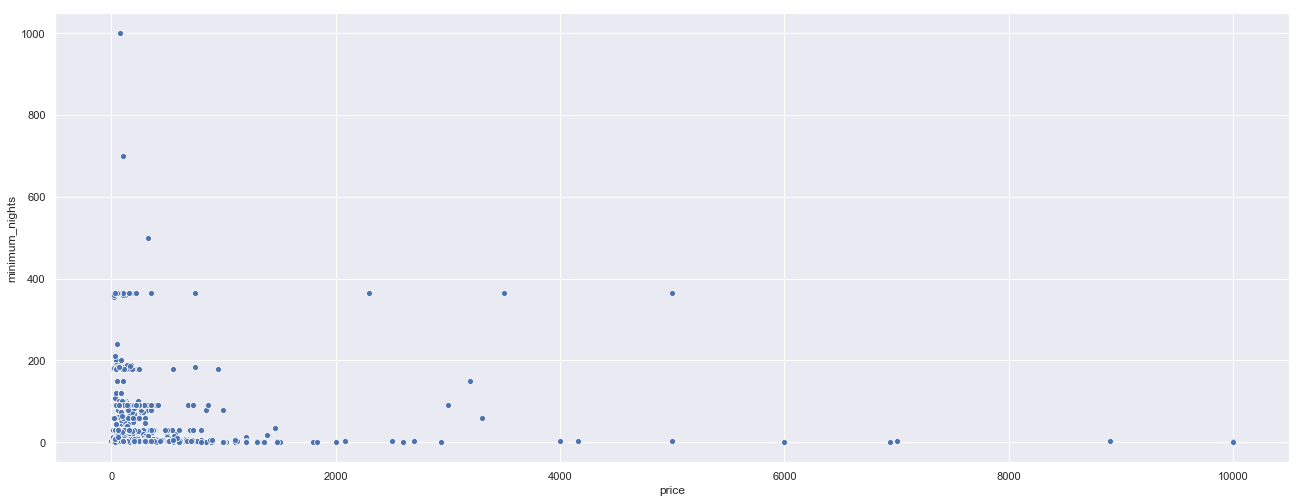

In [16]:
# Plotting a scatterplot for the price vs the minimumnights people stayed in the hotel 
sns.scatterplot(x = 'price', y = 'minimum_nights', data = data1)

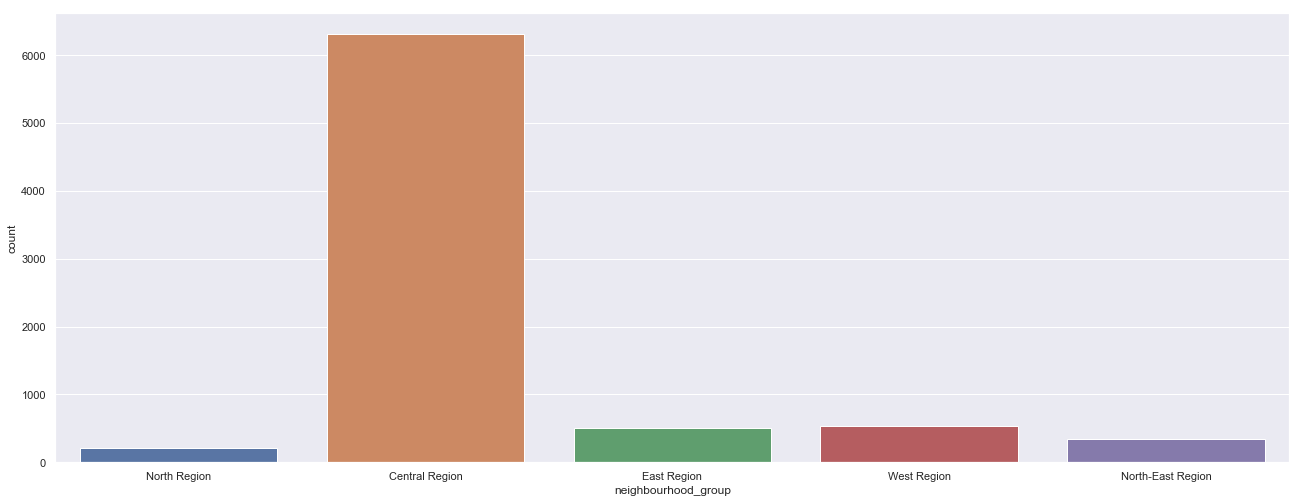

In [17]:
# making a count plot for the neighbourhood_group 
sns.countplot(data1['neighbourhood_group'])

From the above count plot we can see that the central region has the highest count in the neighbourhood

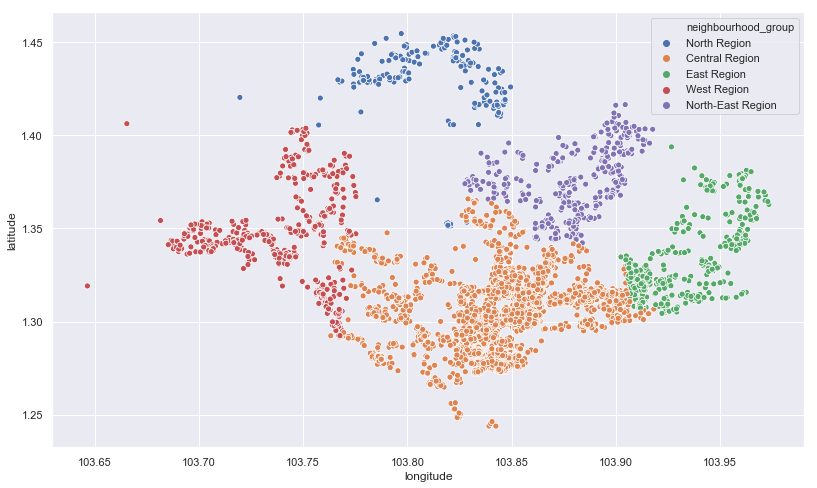

In [18]:
# getting a scatter plot for the distribution of longitude and latittude of the neeghbourhood

plt.figure(figsize = (12, 8))
sns.scatterplot(data1.longitude, data1.latitude, hue = data1.neighbourhood_group)
plt.show()

### Hotel Distribution via a heat map 

In [19]:
from folium.plugins import HeatMap

mp = folium.Map([1.44255, 103.79580], zoom_start=11)
HeatMap(data1[['latitude','longitude']].dropna(), radius=8, gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(mp)
display(mp)

### Rooms occupied by neighbourhood details 

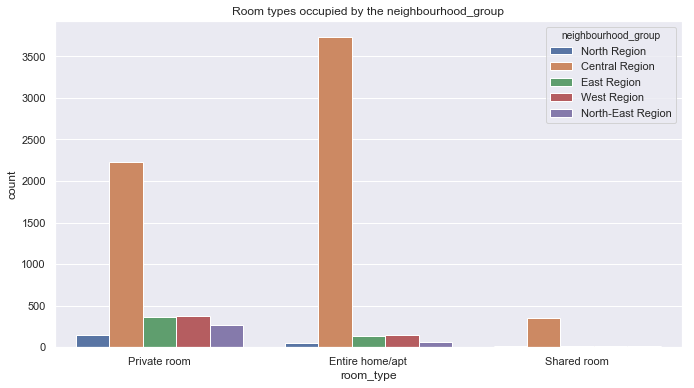

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'room_type', hue = "neighbourhood_group", data = data1)
plt.title("Room types occupied by the neighbourhood_group")
plt.show()

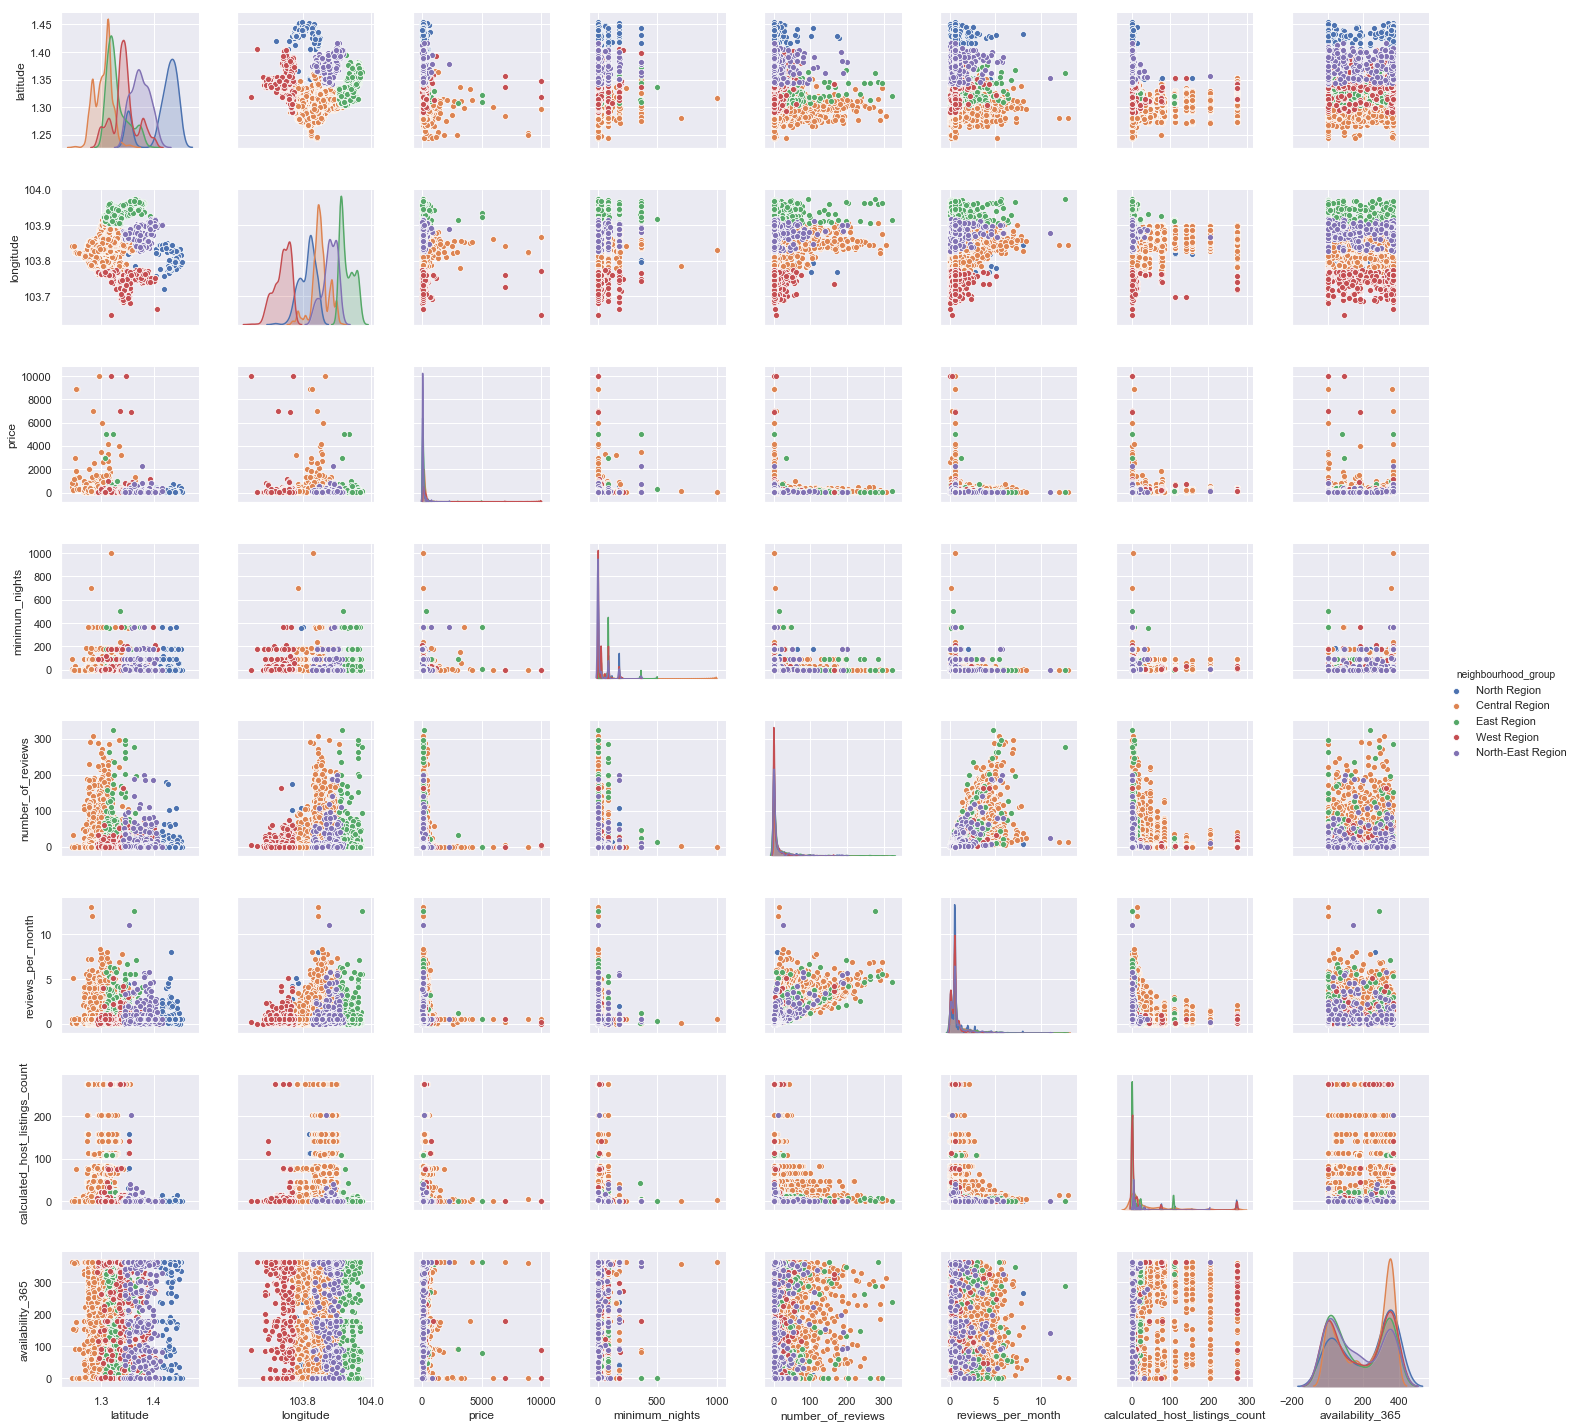

In [21]:
sns.pairplot(data1, hue = "neighbourhood_group" )
plt.show()

### Insights on room types ocupied in each neighbourhood 

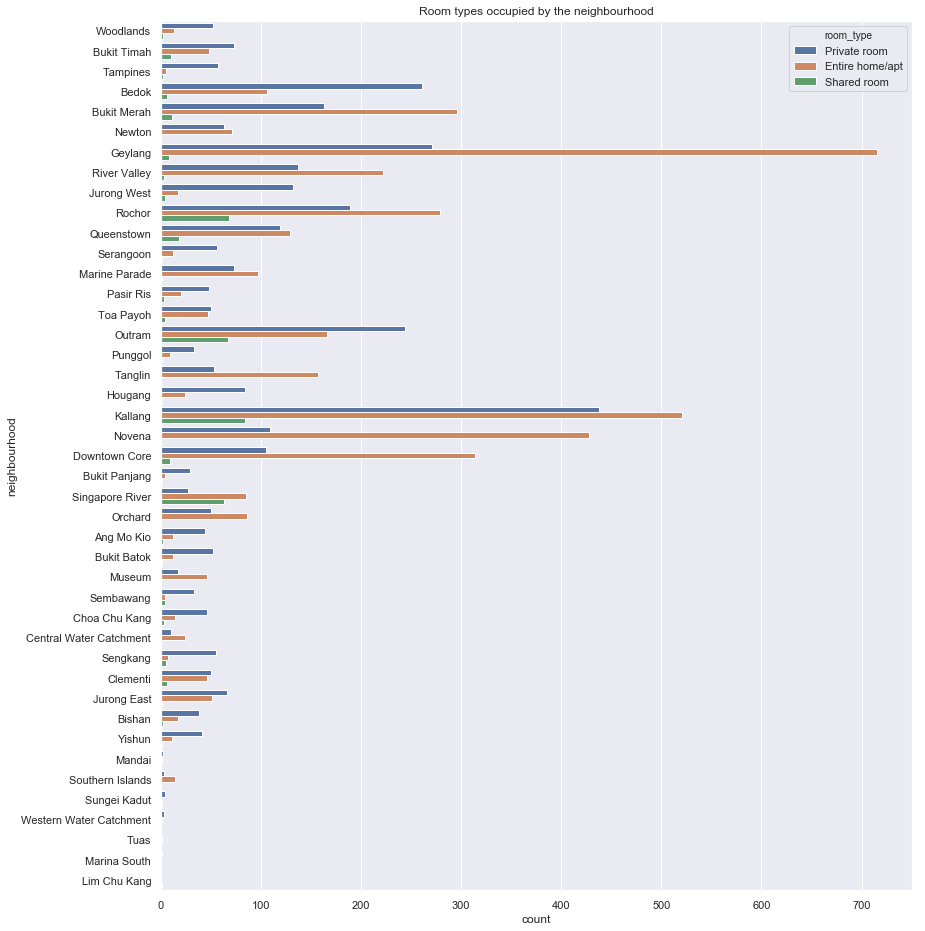

In [22]:
plt.figure(figsize=(12,16))
sns.countplot(y = 'neighbourhood', hue = "room_type", data = data1)
plt.title("Room types occupied by the neighbourhood")
plt.show()

## Looking for the Region with the most Expensive accomodation 

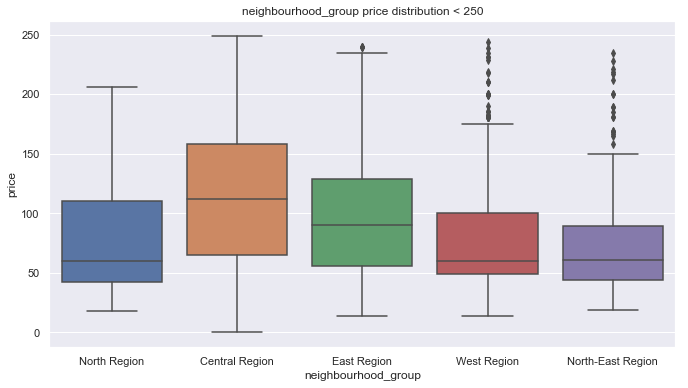

In [24]:

ng = data1[data1.price <250]
plt.figure(figsize=(10,6))
sns.boxplot(y="price",x ='neighbourhood_group', data = ng)
plt.title("neighbourhood_group price distribution < 250")
plt.show()

### Central_region has the most expensive accomodation followed by East_Region 

## Features Engineering 

Insights from my data shows that the type of rooms affect the prices for example there are Private rooms and Entire apartment which give a varing price for my machine to understand this I have to change it to numerical data using OneHotEncoding or LabelEncoding features of the pandas library

In [25]:
# First i make a check point for my data 
data2 = data1.copy()

In [26]:
#Starting with neighbouhood group:
# get the dummies for neghbouhood group as it affects prices 

neighbourhood_groups = pd.get_dummies(data2['neighbourhood_group'])
neighbourhood_groups.head()

,Central Region,East Region,North Region,North-East Region,West Region
0,0,0,1,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [27]:
# add or concatenate it with my data :
data2 = pd.concat([data2, neighbourhood_groups], axis = 1)
data2.head(3)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Central Region,East Region,North Region,North-East Region,West Region
0,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,0.01,2,365,0,0,1,0,0
1,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,0.28,1,365,1,0,0,0,0
2,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,0.20,2,365,0,0,1,0,0


In [28]:
#Dropping the former neighbourhood_group columnm
data2.drop(['neighbourhood_group'], axis = 1, inplace = True)
data2.head(2)

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Central Region,East Region,North Region,North-East Region,West Region
0,Woodlands,1.44255,103.79580,Private room,83,180,1,0.01,2,365,0,0,1,0,0
1,Bukit Timah,1.33235,103.78521,Private room,81,90,18,0.28,1,365,1,0,0,0,0


In [29]:
# OneHotEncode the room_type too
room_types = pd.get_dummies(data2['room_type'])
room_types.head()

,Entire home/apt,Private room,Shared room
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [30]:
# add or concatenate it with my data :
data2 = pd.concat([data2, room_types], axis = 1)
data2.head(3)

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Central Region,East Region,North Region,North-East Region,West Region,Entire home/apt,Private room,Shared room
0,Woodlands,1.44255,103.79580,Private room,83,180,1,0.01,2,365,0,0,1,0,0,0,1,0
1,Bukit Timah,1.33235,103.78521,Private room,81,90,18,0.28,1,365,1,0,0,0,0,0,1,0
2,Woodlands,1.44246,103.79667,Private room,69,6,20,0.20,2,365,0,0,1,0,0,0,1,0


In [31]:
data2.drop(['room_type'], axis = 1, inplace = True)
data2.head(1)

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Central Region,East Region,North Region,North-East Region,West Region,Entire home/apt,Private room,Shared room
0,Woodlands,1.44255,103.7958,83,180,1,0.01,2,365,0,0,1,0,0,0,1,0


In [32]:
data2.columns

Index(['neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'Central Region',
       'East Region', 'North Region', 'North-East Region', 'West Region',
       'Entire home/apt', 'Private room', 'Shared room'],
      dtype='object')

In [33]:
# Re- organising my columns:

my_columns = ['neighbourhood', 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'Central Region',
       'East Region', 'North Region', 'North-East Region', 'West Region',
       'Entire home/apt', 'Private room', 'Shared room','price']

In [34]:
#Placing the new columns inplace of the old one
data2 = data2[my_columns]
data2.columns = my_columns

In [35]:
#Checking the new columns 
data2.head(1)

,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Central Region,East Region,North Region,North-East Region,West Region,Entire home/apt,Private room,Shared room,price
0,Woodlands,1.44255,103.7958,180,1,0.01,2,365,0,0,1,0,0,0,1,0,83


#### Converting the neighbourhood to numerical values using LabelEncoder 



In [36]:
from sklearn import preprocessing

In [37]:
le = preprocessing.LabelEncoder()

le.fit(data2['neighbourhood'])
data2['neighbourhood']=le.transform(data2['neighbourhood'])

In [38]:
data2.head(2)

,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Central Region,East Region,North Region,North-East Region,West Region,Entire home/apt,Private room,Shared room,price
0,41,1.44255,103.79580,180,1,0.01,2,365,0,0,1,0,0,0,1,0,83
1,6,1.33235,103.78521,90,18,0.28,1,365,1,0,0,0,0,0,1,0,81


## Preparing My Model 

In [39]:
# Marking my dependent and independent variables 
X = data2.drop(['price'], axis = 1)
X.head(2)

,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Central Region,East Region,North Region,North-East Region,West Region,Entire home/apt,Private room,Shared room
0,41,1.44255,103.79580,180,1,0.01,2,365,0,0,1,0,0,0,1,0
1,6,1.33235,103.78521,90,18,0.28,1,365,1,0,0,0,0,0,1,0


In [40]:
y = data2['price']

In [41]:
#inspecting
y.head(3)

0    83
1    81
2    69
Name: price, dtype: int64

## Splitting my data into Train and Testing Dataset

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [44]:
len(X_train)

5930

In [45]:
len(X_test)

1977

## Linear Regression Model 

In [46]:
from sklearn import linear_model

In [47]:
# Preparing my model
lr_model = linear_model.LinearRegression(n_jobs = -1)

In [48]:
# Training my model
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

### Checking the Actual Vs the Predicted accuracy 

In [49]:
predicts = lr_model.predict(X_test)
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts.flatten()})
error_airbnb.head()

,Actual Values,Predicted Values
0,181,130.361210
1,50,84.937136
2,28,108.641732
3,178,228.460824
4,44,154.166351


### To get the RMSE Value 

In [50]:
y_testpred = lr_model.predict(X_test)

In [51]:
from math import sqrt

In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
rms = sqrt(mean_squared_error(y_test, y_testpred))

In [54]:
print('RMSE Value :', rms)

RMSE Value : 261.94843753595524


## Using XGBoost 

In [55]:
import xgboost

In [56]:
xgb = xgboost.XGBRegressor(objective='reg:squarederror', n_jobs = -1, random_state = 42)

In [57]:
xgb.fit(X_train, y_train)

C:\Users\Ugoboss\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:squarederror',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [58]:
predicts = xgb.predict(X_test)
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts.flatten()})
error_airbnb.head()

,Actual Values,Predicted Values
0,181,179.318497
1,50,66.218391
2,28,103.085480
3,178,203.949478
4,44,83.788231
